## Distortion Correction

This notebook will explain about correcting Distortion and generate an undistorted image.

There are two main steps to this process: use chessboard images to obtain image points and object points, and then use the OpenCV functions `cv2.calibrateCamera()` and `cv2.undistort()` to compute the calibration and undistortion.


### Generating Imagepoints and ObjectPoints

This below cell will generate image points and object points as we did in earlier notebook.

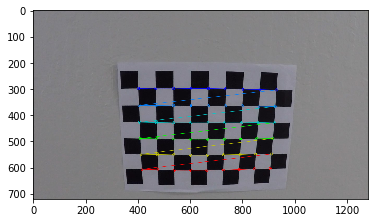

In [2]:


#Import required libraries
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import patches
import glob
import cv2
import os




# These arrays will be used to store object points and image points from all input images.
objpts = [] # 3d points in real world space
imgpts = [] # 2d points in image plane

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Making a list of calibration images from input images
files = os.listdir('camera_cal')

# looking through the list and searching for chessboard corners
for fname in files:
    if fname.startswith('calibration'):
        img = mpimg.imread('camera_cal/'+fname)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Finding the chessboard corners using inbuilt opencv feature findChessboardCorners
        ret, corners = cv2.findChessboardCorners(gray, (9,6), None)

        # If found,we add object points and image points to arrays imagepts and objpts
        if ret == True:
            imgpts.append(corners)
            objpts.append(objp)

            # Draw and display the corners using opencv
            img = cv2.drawChessboardCorners(img, (9,6), corners, ret)                
            
            # Save the image in a premade folder
            plt.imsave('./output_images/ChessboardCorners/'+fname, img)


# Display the last image with Chessboard corners drawn
plt.imshow(img)



Text(0.5, 1, 'Undistorted')

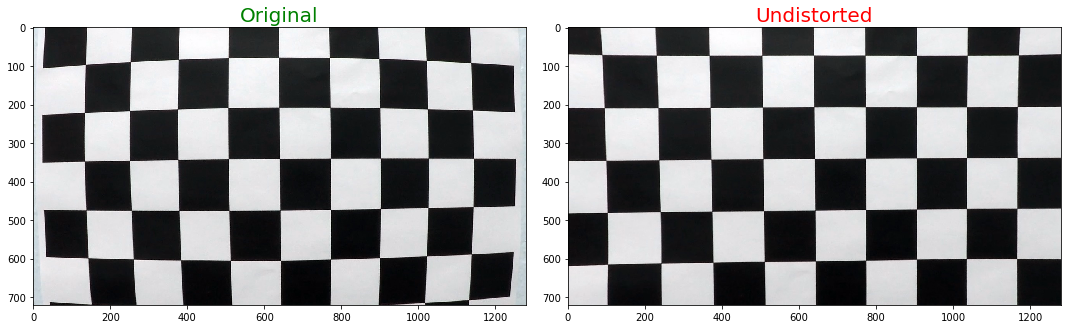

In [6]:
import pickle
# Lets define a simple function to generate undistorted images

def cal_undistort(img, objpoints,imgpoints):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints,imgpoints,gray.shape[::-1],None, None)
    dist_pickle = {}
    dist_pickle["mtx"] = mtx
    dist_pickle["dist"] = dist
    pickle.dump(dist_pickle, open("camera_cal/dist_pickle.p","wb"))
    undist = cv2.undistort(img,mtx,dist, None, mtx)
    return undist


# lets read in the image
img = cv2.imread('camera_cal/calibration1.jpg')

#We will use objpoints and imgpoints from above

undistorted_img = cal_undistort(img,objpts,imgpts)

fig,ax = plt.subplots(1,2, figsize = (15,30))
fig.tight_layout()
ax[0].imshow(img)
ax[0].set_title('Original', fontsize= 20, color = 'g')
ax[1].imshow(undistorted_img)
ax[1].set_title('Undistorted', fontsize= 20, color = 'r')  